# NYC TAXI TRIP DURATION PREDICTION - for Capabl

# CONTENTS:

1. PRE-PROCESSING OF THE DATA
2. EXPLORING DATA ANALYSIS
3. DEVELOPING ALGORITHM
4. TESTING THE MODEL

### Importing the libraries

In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

# 1. PRE-PROCESSING OF THE DATA

- Handling the missing data

- Checking outliers

- Identifying data types

- Feature engineering

### Uploading Training data
 The initial step is to upload the training data to create a model.

In [2]:
#importing data
train_data = pd.read_csv('train_data.csv')
train_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,14-03-2016 17:24,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,12-06-2016 00:43,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,19-01-2016 11:35,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,06-04-2016 19:32,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,26-03-2016 13:30,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1048570,id0002921,1,06-04-2016 14:16,06-04-2016 14:20,1,-73.973015,40.760948,-73.976387,40.755604,N,207
1048571,id1329189,2,24-03-2016 01:26,24-03-2016 01:38,1,-73.985550,40.727257,-73.957039,40.712387,N,740
1048572,id0408460,1,23-02-2016 16:38,23-02-2016 16:48,1,-73.972038,40.750202,-73.998360,40.733360,N,605
1048573,id0147762,1,24-05-2016 07:20,24-05-2016 07:25,1,-73.993332,40.724342,-74.004250,40.707470,N,287


In [3]:
#Shape
print(train_data.shape)

(1048575, 11)


In [4]:
#View the data
train_data.head(8)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,14-03-2016 17:24,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,12-06-2016 00:43,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,19-01-2016 11:35,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,06-04-2016 19:32,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,26-03-2016 13:30,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,30-01-2016 22:01,30-01-2016 22:09,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,17-06-2016 22:34,17-06-2016 22:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,21-05-2016 07:54,21-05-2016 08:20,1,-73.969276,40.797779,-73.922470,40.760559,N,1551


In [5]:
train_data.tail(8)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1048567,id3832385,2,13-01-2016 21:44,13-01-2016 21:56,1,-73.989944,40.725555,-74.000008,40.738731,N,710
1048568,id1594901,1,04-05-2016 11:24,04-05-2016 11:34,1,-73.976509,40.757404,-73.989014,40.755802,N,628
1048569,id1186240,1,29-05-2016 15:29,29-05-2016 15:52,3,-73.993790,40.717987,-73.935524,40.690174,N,1331
1048570,id0002921,1,06-04-2016 14:16,06-04-2016 14:20,1,-73.973015,40.760948,-73.976387,40.755604,N,207
1048571,id1329189,2,24-03-2016 01:26,24-03-2016 01:38,1,-73.985550,40.727257,-73.957039,40.712387,N,740
1048572,id0408460,1,23-02-2016 16:38,23-02-2016 16:48,1,-73.972038,40.750202,-73.998360,40.733360,N,605
1048573,id0147762,1,24-05-2016 07:20,24-05-2016 07:25,1,-73.993332,40.724342,-74.004250,40.707470,N,287
1048574,id0859354,2,15-03-2016 22:00,15-03-2016 22:19,1,-73.988060,40.759548,-74.005585,40.711521,N,1169


## Identifying any missing observations
After loading the data,examine its struture to identify any missing observations that will need to be addressed.

In [6]:
#Info of the data

print('Data Shape',train_data.shape)
train_data.info()

Data Shape (1048575, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1048575 non-null  object 
 1   vendor_id           1048575 non-null  int64  
 2   pickup_datetime     1048575 non-null  object 
 3   dropoff_datetime    1048575 non-null  object 
 4   passenger_count     1048575 non-null  int64  
 5   pickup_longitude    1048575 non-null  float64
 6   pickup_latitude     1048575 non-null  float64
 7   dropoff_longitude   1048575 non-null  float64
 8   dropoff_latitude    1048575 non-null  float64
 9   store_and_fwd_flag  1048575 non-null  object 
 10  trip_duration       1048575 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 88.0+ MB


In [7]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vendor_id,1048575.0,1.534503,0.498808,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1048575.0,1.664382,1.314261,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1048575.0,-73.973420,0.042802,-78.547401,-73.991859,-73.981735,-73.967308,-6.133553e+01
pickup_latitude,1048575.0,40.750942,0.033814,34.359695,40.737377,40.754150,40.768364,5.188108e+01
dropoff_longitude,1048575.0,-73.973361,0.042743,-79.817978,-73.991310,-73.979729,-73.963005,-6.133553e+01
dropoff_latitude,1048575.0,40.751834,0.036450,32.181141,40.735939,40.754551,40.769840,4.391176e+01
trip_duration,1048575.0,962.144784,5853.002178,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


## Removing the Outliers
Here we are checking the minimum and maximum values of each feature in training data and setting ranges inorder to avoid out-of-range values in test data.

In [8]:
# Remove passenger_count outliers
train_data = train_data[train_data['passenger_count']>0]
train_data = train_data[train_data['passenger_count']<9]

In [9]:
# Remove coordinate outliers
train_data = train_data[train_data['pickup_longitude'] <= -73.75]
train_data = train_data[train_data['pickup_longitude'] >= -74.03]
train_data = train_data[train_data['pickup_latitude'] <= 40.85]
train_data = train_data[train_data['pickup_latitude'] >= 40.63]
train_data = train_data[train_data['dropoff_longitude'] <= -73.75]
train_data = train_data[train_data['dropoff_longitude'] >= -74.03]
train_data = train_data[train_data['dropoff_latitude'] <= 40.85]
train_data = train_data[train_data['dropoff_latitude'] >= 40.63]

In [10]:
# Remove trip_duration outliers
trip_duration_mean = np.mean(train_data['trip_duration'])
trip_duration_std = np.std(train_data['trip_duration'])
train_data = train_data[train_data['trip_duration']<=trip_duration_mean + 2*trip_duration_std]
train_data = train_data[train_data['trip_duration']>= trip_duration_mean - 2*trip_duration_std]

In [11]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vendor_id,1033016.0,1.533844,0.498854,1.000000,1.000000,2.000000,2.000000,2.000000
passenger_count,1033016.0,1.664081,1.314200,1.000000,1.000000,1.000000,2.000000,6.000000
pickup_longitude,1033016.0,-73.973804,0.037168,-74.029953,-73.991867,-73.981758,-73.967476,-73.750664
pickup_latitude,1033016.0,40.751056,0.027450,40.630001,40.737495,40.754162,40.768330,40.849998
dropoff_longitude,1033016.0,-73.973564,0.032569,-74.029953,-73.991280,-73.979836,-73.963486,-73.750000
dropoff_latitude,1033016.0,40.751685,0.029660,40.630001,40.736320,40.754532,40.769550,40.849998
trip_duration,1033016.0,824.305134,645.637286,1.000000,394.000000,655.000000,1056.000000,12527.000000


## Identifying the Datatypes
Here 11 features are given to predict the taxi trip duration. For this we are observing the datatypes of each feature.

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033016 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1033016 non-null  object 
 1   vendor_id           1033016 non-null  int64  
 2   pickup_datetime     1033016 non-null  object 
 3   dropoff_datetime    1033016 non-null  object 
 4   passenger_count     1033016 non-null  int64  
 5   pickup_longitude    1033016 non-null  float64
 6   pickup_latitude     1033016 non-null  float64
 7   dropoff_longitude   1033016 non-null  float64
 8   dropoff_latitude    1033016 non-null  float64
 9   store_and_fwd_flag  1033016 non-null  object 
 10  trip_duration       1033016 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 94.6+ MB


In [13]:
# Convert timestamps to date objects

#Pickups
train_data['pickup_datetime'] = pd.to_datetime(train_data.pickup_datetime)
# Drop-offs
train_data['dropoff_datetime'] = pd.to_datetime(train_data.dropoff_datetime)
# Confirm changes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033016 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1033016 non-null  object        
 1   vendor_id           1033016 non-null  int64         
 2   pickup_datetime     1033016 non-null  datetime64[ns]
 3   dropoff_datetime    1033016 non-null  datetime64[ns]
 4   passenger_count     1033016 non-null  int64         
 5   pickup_longitude    1033016 non-null  float64       
 6   pickup_latitude     1033016 non-null  float64       
 7   dropoff_longitude   1033016 non-null  float64       
 8   dropoff_latitude    1033016 non-null  float64       
 9   store_and_fwd_flag  1033016 non-null  object        
 10  trip_duration       1033016 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 94.6+ MB


## Feature Engineering

### Finding the features required to predict the trip_duration.

In [14]:
# Delimit pickup_datetime variable
train_data['pickup_date'] = train_data['pickup_datetime'].dt.date # Extract date
train_data['pickup_time'] = train_data['pickup_datetime'].dt.time # Extract time

# Delimit dropoff_datetime variables
train_data['dropoff_date'] = train_data['dropoff_datetime'].dt.date # Extract date
train_data['dropoff_time'] = train_data['dropoff_datetime'].dt.time # Extract time

# Additional pickup features
train_data['pickup_month'] = train_data['pickup_datetime'].dt.month # Extract month

# train_data['pickup_month'] = train_data.pickup_datetime.dt.to_period('M') # Extract yearmonth

#train_data['pickup_YYYYMM'] = train_data['pickup_datetime'].apply(lambda x: x.strftime('%Y%m')) # Extract yearmonth

train_data['pickup_hour'] = train_data['pickup_datetime'].dt.hour # Extract hour
train_data['pickup_weekday'] = train_data['pickup_datetime'].dt.dayofweek # Extract day of week

# Drop concatentated timestamp columns
train_data.drop(['pickup_datetime'], axis = 1, inplace = True)
train_data.drop(['dropoff_datetime'], axis = 1, inplace = True)

# Confirm changes
train_data.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'pickup_date', 'pickup_time',
       'dropoff_date', 'dropoff_time', 'pickup_month', 'pickup_hour',
       'pickup_weekday'],
      dtype='object')

# 2. EXPLORING DATA ANALYSIS

From the above index, we need to consider each of the parameters to predict the trip_duration. For this, we use different graphs to plot each of the feature and compare them.

## Distribution of Trip Durations

### We used three different plots to examine the distribution of trip duration:

### 1. Box Plot:
The box plot shows the distribution of trip durations and helps identify potential outliers. It provides information about the median, quartiles, and potential extreme values.

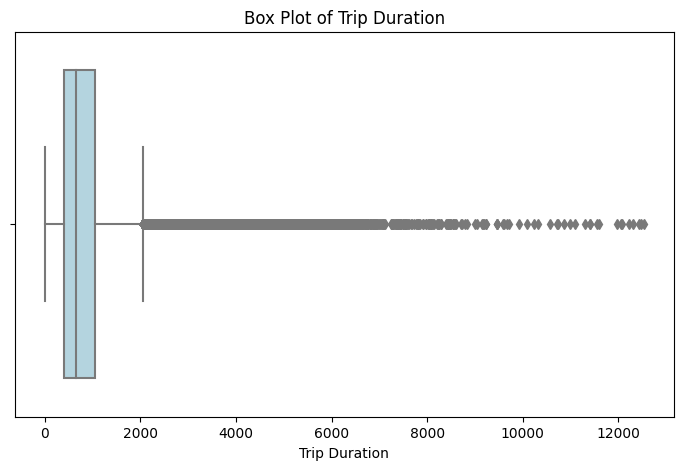

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot
plt.figure(figsize=(8.5, 5))
sns.boxplot(x=train_data['trip_duration'], color='lightblue')

# Labeling and title
plt.xlabel('Trip Duration')
plt.title('Box Plot of Trip Duration')

plt.show()

### 2. Violin Plot:
The violin plot is similar to the box plot but provides more information about the data distribution by showing the kernel density estimate. It also shows the quartiles and any potential outliers.

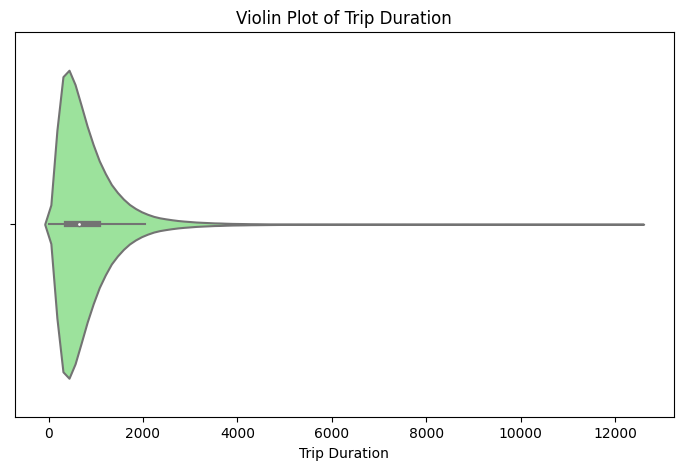

In [16]:
# Violin plot
plt.figure(figsize=(8.5, 5))
sns.violinplot(x=train_data['trip_duration'], color='lightgreen')

# Labeling and title
plt.xlabel('Trip Duration')
plt.title('Violin Plot of Trip Duration')

plt.show()

### 3. Probability Density Plot with Histogram:
This plot combines a histogram of the trip duration data with a probability density plot (red dashed line) representing a normal distribution with the same mean and standard deviation as the trip duration data. This helps visualize if the data follows a normal distribution.

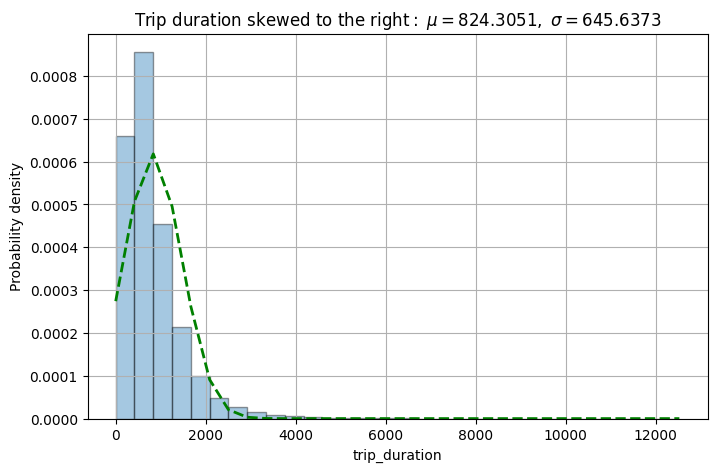

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming you have a pandas DataFrame called 'train_data' with a column 'trip_duration'
# Define the mean and standard deviation of 'trip_duration'
mu = train_data['trip_duration'].mean()
sigma = train_data['trip_duration'].std()
num_bins = 30

# Histogram
fig = plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(train_data['trip_duration'], num_bins, density=True, edgecolor='black', lw=1, alpha=0.40)

# Normal Distribution
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'g--', linewidth=2)

# Labeling and title
plt.xlabel('trip_duration')
plt.ylabel('Probability density')
plt.title(r'$\mathrm{Trip\ duration\ skewed\ to\ the\ right:}\ \mu=%.4f,\ \sigma=%.4f$' % (mu, sigma))

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

Using these different plots, you can examine the distribution of trip duration from multiple perspectives and identify any transformations or patterns that may need to be applied for further analysis.

In [18]:
# Statistical summary
train_data.describe()[['trip_duration']].transpose()

,count,mean,std,min,25%,50%,75%,max
trip_duration,1033016.0,824.305134,645.637286,1.0,394.0,655.0,1056.0,12527.0


## Store and Forward trips using Violin plot

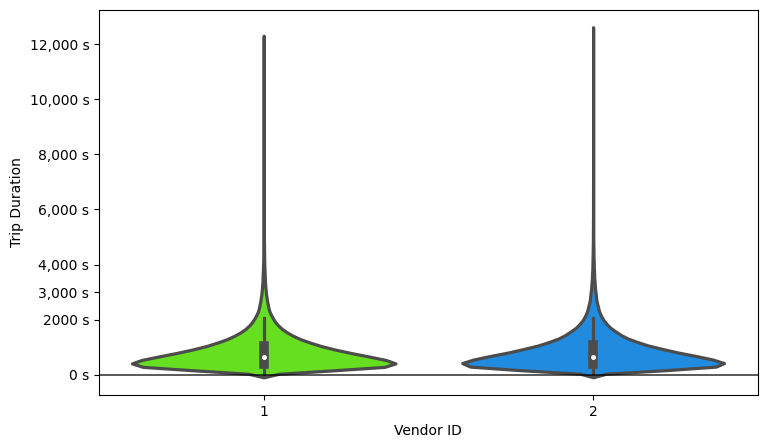

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8.5, 5))
sns.violinplot(x='vendor_id', y='trip_duration', data=train_data, palette='gist_rainbow', linewidth=2.3)

# Customize tick labels of the y-axis
tick_positions = [0, 2000, 3000, 4000, 6000, 8000, 10000, 12000]
tick_labels = ['0 s', '2000 s', '3,000 s', '4,000 s', '6,000 s', '8,000 s', '10,000 s', '12,000 s']
plt.yticks(tick_positions, tick_labels)

# Bolding horizontal line at y = 0
plt.axhline(y=0, color='black', linewidth=1.3, alpha=0.7)

# Set labels for the x and y axes
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration')

plt.show()

In [20]:
train_data.groupby('vendor_id')['trip_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
vendor_id,,,,,,,,
1,481547.0,818.492932,637.823800,1.0,392.0,652.0,1052.0,12218.0
2,551469.0,829.380393,652.341779,1.0,395.0,657.0,1060.0,12527.0


## Bar plot for vendor_id

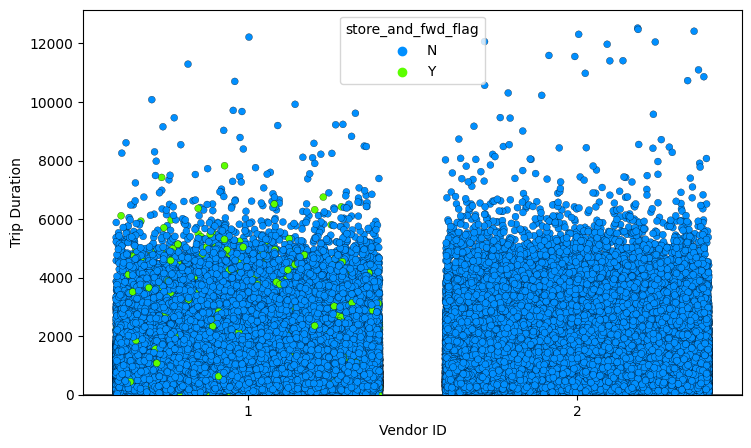

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8.5, 5))

# Create bar plot
sns.barplot(x='vendor_id', y='trip_duration', data=train_data, ci=None,
            palette='gist_rainbow', alpha=0.7, edgecolor='black', linewidth=2)

# Create strip plot
sns.stripplot(data=train_data, x='vendor_id', y='trip_duration', jitter=0.4, size=5,
              edgecolor='black', linewidth=0.2, palette='gist_rainbow_r', hue='store_and_fwd_flag')

# Bolding horizontal line at y = 0
plt.axhline(y=0, color='black', linewidth=1.3, alpha=0.7)

# Set labels for the x and y axes
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration')

plt.show()

In [22]:
train_data.groupby('passenger_count')['trip_duration'].describe().transpose()

passenger_count,1,2,3,4,5,6
count,732436.000000,148582.000000,42372.000000,20018.000000,55414.000000,34194.000000
mean,812.850285,864.329253,849.477414,875.144420,832.031382,822.276627
std,635.320679,684.841622,653.907763,687.584274,648.245242,640.024648
min,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000
25%,388.000000,412.000000,414.000000,421.000000,398.000000,393.000000
50%,647.000000,679.000000,676.000000,691.000000,661.000000,653.000000
75%,1044.000000,1100.000000,1085.000000,1120.000000,1062.000000,1055.000000
max,12480.000000,12313.000000,12527.000000,9922.000000,11591.000000,8041.000000


## Passenger count using Scatter plot

This doesnt show much effect on trip_duration prediction.

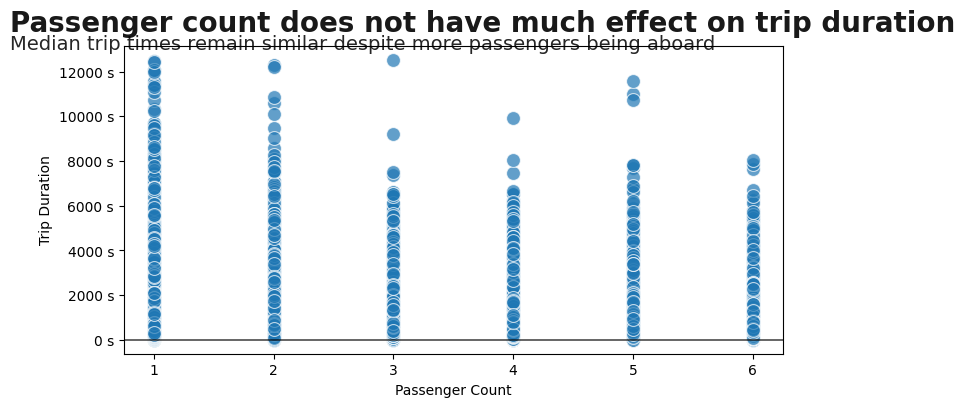

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8.5, 4))

# Create scatter plot
sns.scatterplot(x='passenger_count', y='trip_duration', data=train_data, palette='gist_rainbow', alpha=0.7, s=100)

# Customize tick size
plt.tick_params(axis='both', which='major', labelsize=10)

# Customize tick labels of the y-axis
plt.yticks([-0, 2000, 4000, 6000, 8000, 10000, 12000], ['0 s', '2000 s', '4000 s', '6000 s', '8000 s', '10000 s', '12000 s'])

# Bolding horizontal line at y = 0
plt.axhline(y=0, color='black', linewidth=1.2, alpha=0.7)

# Add text annotations
plt.text(x=-0.2, y=13800, s="Passenger count does not have much effect on trip duration", fontsize=20, weight='bold', alpha=0.90)
plt.text(x=-0.2, y=13000.3, s='Median trip times remain similar despite more passengers being aboard', fontsize=14, alpha=0.85)

# Set labels for the x and y axes
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration')

plt.show()

## Trips by Hour and Day of Week

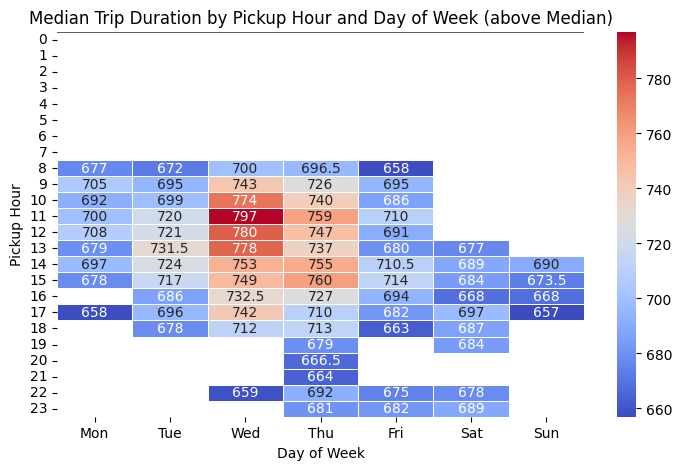

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trips by Hour and Day of Week
trip_duration_median = train_data['trip_duration'].median()
plt.figure(figsize=(8.5, 5))
pickup_hourday = train_data.groupby(['pickup_hour', 'pickup_weekday'])['trip_duration'].median().unstack()

# Set the color map to diverging for better observation of differences
hourday_graph = sns.heatmap(pickup_hourday[pickup_hourday > trip_duration_median],
                            lw=0.5, annot=True, cmap='coolwarm', fmt='g', annot_kws={"size": 10})

# Customize tick label size
hourday_graph.tick_params(axis='both', which='major', labelsize=10)

# Customize tick labels of the y-axis
hourday_graph.set_xticklabels(labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Bolding horizontal line at y = 0
hourday_graph.axhline(y=0, color='black', linewidth=1.3, alpha=0.7)

# Set labels for the x and y axes
plt.xlabel('Day of Week')
plt.ylabel('Pickup Hour')

plt.title('Median Trip Duration by Pickup Hour and Day of Week (above Median)')

plt.show()

## Pie plot - Variation by month

Here we are checking trip duration in every month to observe effect of time range due to seasonal changes. Pie chart represents clearly if the data contains more than 5 variables.

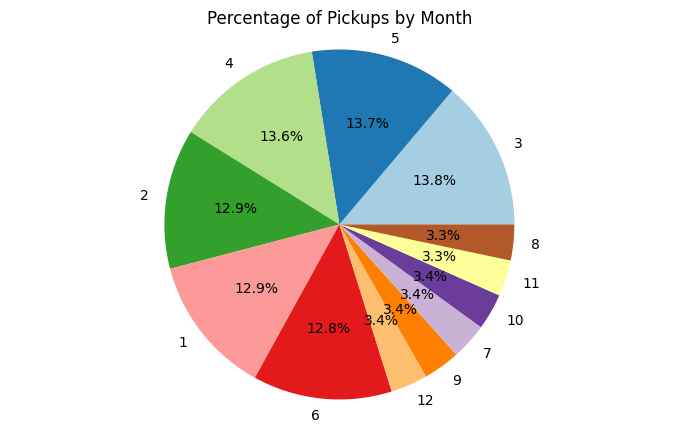

In [25]:
import matplotlib.pyplot as plt

# Group the data by month and calculate the percentage of pickups for each month
pickup_counts_by_month = train_data['pickup_month'].value_counts()
total_pickups = pickup_counts_by_month.sum()
percentage_pickups_by_month = (pickup_counts_by_month / total_pickups) * 100

# Create a pie chart
plt.figure(figsize=(8.5, 5))
plt.pie(percentage_pickups_by_month, labels=percentage_pickups_by_month.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Set the aspect ratio to be equal to draw a perfect circle
plt.axis('equal')

# Add a title
plt.title('Percentage of Pickups by Month')

plt.show()

In [26]:
# Statistical summary
train_data.groupby('pickup_month')['trip_duration'].describe().transpose()

pickup_month,1,2,3,4,5,6,7,8,9,10,11,12
count,133267.000000,133657.000000,142991.000000,140752.000000,141297.000000,132734.000000,34652.000000,34161.000000,35162.000000,34609.000000,34474.000000,35260.000000
mean,812.014497,784.606523,811.044786,838.200615,857.674813,852.870071,797.941735,825.969000,809.654570,811.117657,822.743314,831.671809
std,628.261440,591.890932,630.581103,648.387979,692.618816,687.891731,595.242464,664.622778,626.855828,628.993112,644.011793,647.902220
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
25%,394.000000,382.000000,389.000000,400.000000,401.000000,402.000000,390.000000,390.000000,391.000000,388.000000,393.000000,398.000000
50%,648.000000,632.000000,646.000000,668.000000,673.000000,669.000000,646.000000,646.000000,647.000000,646.000000,653.000000,663.000000
75%,1040.000000,1014.000000,1042.000000,1080.000000,1096.000000,1085.000000,1025.000000,1053.000000,1032.000000,1046.000000,1052.000000,1069.000000
max,12051.000000,12218.000000,12313.000000,11556.000000,12527.000000,12419.000000,6517.000000,9462.000000,8716.000000,8460.000000,12480.000000,9223.000000


## pickup and drop off points
Here, we will plot the pickup and drop off points of each taxi ride by taking longitude and latitude values.

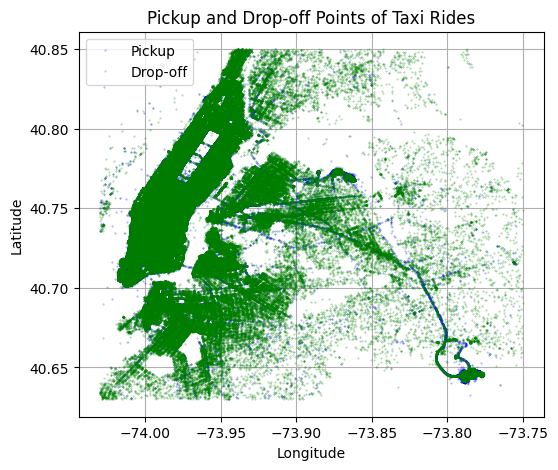

In [27]:
import matplotlib.pyplot as plt

# Extract pickup and drop-off points
pickup_longitude = list(train_data['pickup_longitude'])
pickup_latitude = list(train_data['pickup_latitude'])
dropoff_longitude = list(train_data['dropoff_longitude'])
dropoff_latitude = list(train_data['dropoff_latitude'])

# Plot pickup and drop-off points
plt.figure(figsize=(6, 5))
plt.plot(pickup_longitude, pickup_latitude, '.', color='blue', alpha=0.4, markersize=0.8, label='Pickup')
plt.plot(dropoff_longitude, dropoff_latitude, '.', color='green', alpha=0.4, markersize=0.8, label='Drop-off')

plt.title('Pickup and Drop-off Points of Taxi Rides')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)

plt.show()

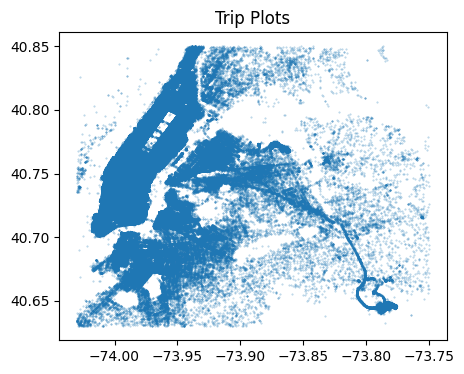

In [28]:
longitude = list(train_data.pickup_longitude) + list(train_data.dropoff_longitude)
latitude = list(train_data.pickup_latitude) + list(train_data.dropoff_latitude)
plt.figure(figsize = (5,4))
plt.plot(longitude,latitude,'.',alpha = .40, markersize = .8)
plt.title('Trip Plots')
plt.show()

## Plotting the neighborhood

Using the BIRCH alogirthm, we can cluster the data points into the different neighborhoods of NYC.

(BIRCH is a hierarchical clustering algorithm designed for large datasets. It uses a tree-based structure to efficiently cluster data, making it suitable for handling huge datasets without needing to store the entire dataset in memory.)

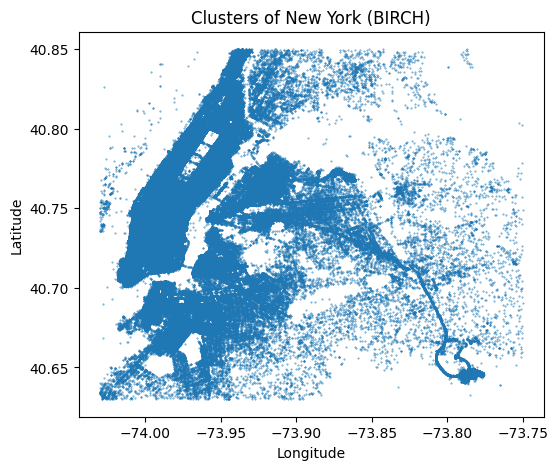

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import Birch

# Create data frame of coordinates
loc_df = pd.DataFrame()
loc_df['longitude'] = longitude
loc_df['latitude'] = latitude

# BIRCH Clustering
birch = Birch(n_clusters=15, threshold=0.1, branching_factor=50)
loc_df['label'] = birch.fit_predict(loc_df)

# Plot the clusters
plt.figure(figsize=(6, 5))
for label in loc_df['label'].unique():
    plt.plot(loc_df.longitude[loc_df.label == label], loc_df.latitude[loc_df.label == label], '.', alpha=0.8, markersize=0.8)
plt.title('Clusters of New York (BIRCH)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Calculating Relation Between Variables
In the next step of our analysis, we will explore how each feature is related to the target variable and investigate potential correlations among different features.

Feature Importance: By examining how each feature relates to the target variable (in this case, 'trip_duration'), we can identify the most influential features that have a significant impact on the target variable. This information will help us prioritize and focus on the most relevant features during modeling.

Identifying Redundant Features: Features that have a high correlation with each other (correlation coefficient > 0.70) may convey redundant information. Removing these highly correlated features can help reduce the dimensionality of the dataset and improve the efficiency of our models without sacrificing predictive power.

Model Performance: Highly correlated features can lead to multicollinearity issues, making it challenging for models to distinguish their individual effects on the target variable. Identifying and addressing these correlations can lead to more accurate and stable model performance.

List of numerical features in descending order by their correlation with trip_duration:

pickup_longitude: 0.3624159669466718
dropoff_longitude: 0.25435509069594037
pickup_latitude: -0.23578933817562073
dropoff_latitude: -0.196500196851988
pickup_hour: 0.030887792384612266
pickup_weekday: -0.021555403222292338
passenger_count: 0.014259878789145359
pickup_month: 0.012023312815705725


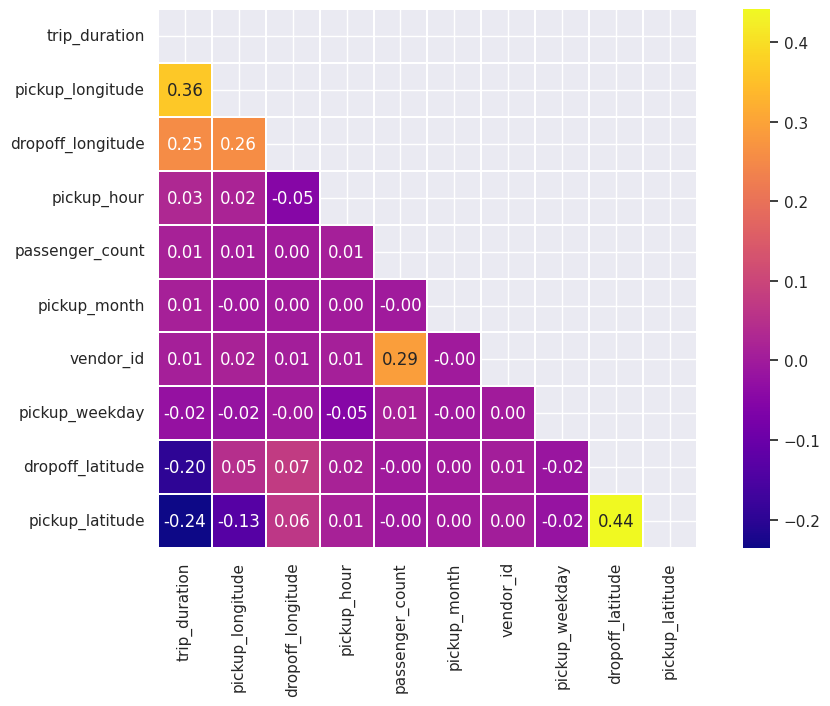

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate correlations with trip_duration
correlations = train_data.select_dtypes(include=['float64', 'int64']).iloc[:, 1:].corr()
correlation_dict = correlations['trip_duration'].to_dict()
del correlation_dict['trip_duration']

print("List of numerical features in descending order by their correlation with trip_duration:\n")
for feature, correlation in sorted(correlation_dict.items(), key=lambda x: -abs(x[1])):
    print(f"{feature}: {correlation}")

# Correlation matrix heatmap
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 7))

# Select top k correlated variables for heatmap
top_k = 70
selected_cols = correlation_matrix.nlargest(top_k, 'trip_duration')['trip_duration'].index
correlation_matrix_subset = np.corrcoef(train_data[selected_cols].values.T)

# Generate mask for upper triangle
mask = np.zeros_like(correlation_matrix_subset, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1)
sns.heatmap(correlation_matrix_subset, mask=mask, cbar=True, annot=True, square=True,
            fmt='.2f', annot_kws={'size': 12}, yticklabels=selected_cols.values,
            xticklabels=selected_cols.values, cmap='plasma', lw=0.1)
plt.show()

# 3. DEVELOPING ALGORITHM
Before prototyping a machine learning algorithm, it is essential to ensure that the dataset is "model ready." The following steps need to be taken:

- Check for Missing Data: Confirm that there are no missing values in the dataset. Missing data can lead to errors in the model and may require imputation.

- Encode Categorical Features: Ensure that all categorical features are transformed into numerical representations. Machine learning models typically require numerical input, and encoding categorical variables is necessary for accurate predictions.

- Remove Unnecessary Features: Eliminate any irrelevant or redundant features from the dataset. Unnecessary features can add noise to the model and may lead to overfitting or decreased model performance.

By following these steps, the data will be prepared and ready for use in the machine learning algorithm, improving the accuracy and effectiveness of the model.

In [31]:
# Check for categorical variables
train_data.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_month,pickup_hour,pickup_weekday
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17:24:00,2016-03-14,17:32:00,3,17,0
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-12-06,00:43:00,2016-12-06,00:54:00,12,0,1
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11:35:00,2016-01-19,12:10:00,1,11,1
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-06-04,19:32:00,2016-06-04,19:39:00,6,19,5
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13:30:00,2016-03-26,13:38:00,3,13,5


In [32]:
# Encode categorical variables
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].map({'N':0,'Y':1})

In [33]:
# Splitting the data
# Create matrix of features
X = train_data[['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag','pickup_month', 'pickup_hour',
       'pickup_weekday']] # double brackets!

# Create array of target variable
y = train_data['trip_duration']

# Create train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### - For predicting continuous values like taxi trip duration, regression algorithms are more appropriate. Linear regression, decision trees, random forests, gradient boosting, and neural networks are examples of regression algorithms that are commonly used for such tasks.

## Linear Regression
Before applying linear regression, it is essential to consider certain assumptions.

First, we assume that the independent and dependent variables have a linear relationship.
Second, the variables should be distributed regularly, which might require non-linear transformations if not met. Third, we prefer low correlation between independent variables to avoid multicollinearity.
Lastly, there should be no autocorrelation among residuals, implying that the outcome is independent of preceding outcomes, and residuals exhibit homoscedasticity.

However, it is crucial to assess whether these assumptions hold for the specific dataset under consideration.

In [34]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error

# Instantiate Linear Regression model
linear_reg_model = LinearRegression()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model to the training data
linear_reg_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_linear_reg = linear_reg_model.predict(X_test)

# Evaluate model performance
print('\nLinear Regression Performance Metrics:')
print('-------------------------------------------------')
print('R^2 =', explained_variance_score(y_test, y_pred_linear_reg))
print('MAE = ', mean_absolute_error(y_test, y_pred_linear_reg))
print('MSE = ', mean_squared_error(y_test, y_pred_linear_reg))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_linear_reg)))


Linear Regression Performance Metrics:
-------------------------------------------------
R^2 = 0.22743364200614224
MAE =  406.6527465348167
MSE =  320123.7221143094
RMSE =  565.7947703136796


## Gradient boosting algorithm
In the context of taxi trip duration prediction, Gradient Boosting excels at capturing intricate patterns and nonlinear relationships that might exist between various factors influencing trip duration, such as time of day, day of the week, traffic conditions, and weather.

It sequentially adds decision trees, each focusing on reducing the errors made by the previous ones.

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate model object
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)

# Fit to training data
gb_reg.fit(X_train, y_train)

# Predict
y_pred_gb = gb_reg.predict(X_test)

# Score It
print('\nGradient Boosting Performance Metrics:')
print('----------------------------------------------')
print('R^2 =', explained_variance_score(y_test, y_pred_gb))
print('MAE = ', mean_absolute_error(y_test, y_pred_gb))
print('MSE = ', mean_squared_error(y_test, y_pred_gb))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_gb)))


Gradient Boosting Performance Metrics:
----------------------------------------------
R^2 = 0.6034685777448604
MAE =  287.4966977188188
MSE =  164308.42231708145
RMSE =  405.34975307391204


## Random forest algorithm
Random Forest can effectively handle high-dimensional data and complex interactions among features. It is robust to overfitting and provides a good balance between bias and variance.

Random Forest is particularly useful when dealing with noisy or missing data, as it can impute missing values and handle outliers more gracefully than some other algorithms.

In [38]:
# Fit
# Import model
from sklearn.ensemble import RandomForestRegressor

# Instantiate model object
rforest = RandomForestRegressor(n_estimators = 20, n_jobs = -1)

# Fit to training data
rforest = rforest.fit(X_train,y_train)
print(rforest)

# Predict
y_pred_rforest = rforest.predict(X_test)

# Score It
from sklearn import metrics
print('\nRandom Forest Regression Performance Metrics:')
print('-----------------------------------------------------')
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_rforest))
print('MAE = ',metrics.mean_absolute_error(y_test, y_pred_rforest))
print('MSE =',metrics.mean_squared_error(y_test, y_pred_rforest))
print('RMSE = ',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rforest)))

RandomForestRegressor(n_estimators=20, n_jobs=-1)

Random Forest Regression Performance Metrics:
-----------------------------------------------------
R^2 = 0.754413654482603
MAE =  201.66596414315953
MSE = 101898.0960494928
RMSE =  319.2148117639481


# 4. MODEL DEPLOYMENT
As we can see that Random Forest algorithm gives more accuracy than Linear Regression and Gradient Boosting. So first, we need to pre-process the test data in the same manner as above before feeding it into the model.

In [39]:
# Load test data
test_data = pd.read_csv('test_data.csv')

# Test data info
test_data.info()

# Test data shape
print('shape',test_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB
shape (625134, 9)


In [40]:
# Convert timestamps to date objects
test_data['pickup_datetime'] = pd.to_datetime(test_data.pickup_datetime) # Pickups

# Delimit pickup_datetime variable
test_data['pickup_date'] = test_data['pickup_datetime'].dt.date # Extract date
test_data['pickup_time'] = test_data['pickup_datetime'].dt.time # Extract time

# Additional pickup features
test_data['pickup_month'] = test_data['pickup_datetime'].dt.month # Extract month

#train_data['pickup_YYYYMM'] = train_data['pickup_datetime'].apply(lambda x: x.strftime('%Y%m')) # Extract yearmonth
test_data['pickup_hour'] = test_data['pickup_datetime'].dt.hour # Extract hour
test_data['pickup_weekday'] = test_data['pickup_datetime'].dt.dayofweek # Extract day of week

# Encode categorical variables
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].map({'N':0,'Y':1})